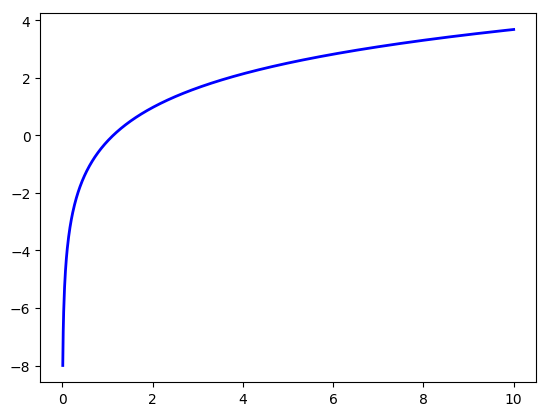

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f334c2f6250>

In [13]:
#using JuMP # import nonlinear optimization routines

using PyPlot

# calculate the Value function for all values of capital

K = linspace(0, 10, 1000); # K is the space for both k and k'

# make an initial guess for V()
V0 = zeros(length(K), 1);

alpha = 0.3;
pi = 0.9; # persistence of the shock
beta = 0.9;
delta = 0.1;
iter = 0;
diff = 1;
tol = 1.0e-4;
maxiter = 1e5;

Pi = [pi 1-pi; 1-pi pi];

while diff > tol
    
    iter += 1;
    
    # make the utility matrix
    U = log(K.^alpha - delta.*K);
    
    V1 = maximum(U + beta*V0, 2);
    
    diff = maximum(V1-V0);
    V0 = V1;
    
    if iter > maxiter
        break
    end
end

plot(K, V0, color="blue", linewidth=2.0, linestyle="-")